In [105]:
#Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

import tensorflow as tf
from tensorflow import keras

#https://www.youtube.com/watch?v=iqQgED9vV7k&ab_channel=codebasics

In [107]:
#load dataset

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() #train-test 0.75-0.25 split

In [108]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [63]:
#print x_train
# 28X28 grid

print(x_train[1].shape)
print("\n")
print(x_train[1])

(28, 28)


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252

5


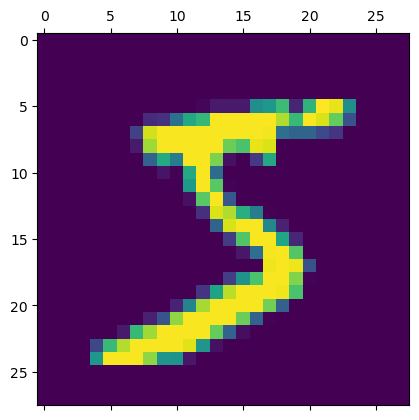

In [78]:
#plot image 

plt.matshow(x_train[0])

#print y_train

print(y_train[0])

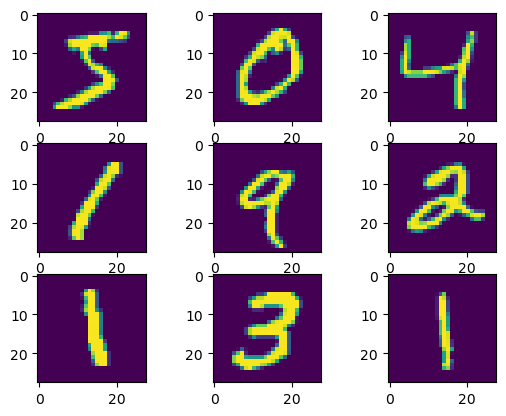

In [79]:
# plot first few images

for i in range(9):
    
    # define subplot
    plt.subplot(330 + 1 + i)
    
    # plot pixel data
    plt.imshow(x_train[i])
    
# show the figure
plt.show()

In [98]:
#normalize data by scaling

x_train = x_train / 255
x_test = x_test / 255

In [99]:
#flatten x grids into longitutdal input

x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

In [101]:
# Train Neural Network model

#define dense sequential neural network with 784 inputs, 10 outputs and sigmoid activation function

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4665 - accuracy: 0.8787
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3035 - accuracy: 0.9146
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2830 - accuracy: 0.9210
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2729 - accuracy: 0.9235
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2668 - accuracy: 0.9255
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2619 - accuracy: 0.9276
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2584 - accuracy: 0.9282
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2553 - accuracy: 0.9286
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2527 - accuracy: 0.9301
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.250

In [102]:
#Evaluate Model on test data

model.evaluate(x_test, y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.2649 - accuracy: 0.9262


[0.2648526728153229, 0.9261999726295471]

In [103]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


array([2.27388041e-03, 1.26025181e-08, 1.67500526e-02, 9.60843265e-01,
       8.53719306e-04, 1.02730796e-01, 3.66437618e-08, 9.99815583e-01,
       6.33395314e-02, 5.21324217e-01], dtype=float32)

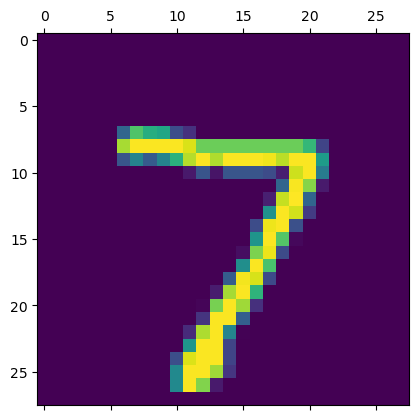

In [109]:
plt.matshow(x_test[0])
y_pred[0]

In [110]:
np.argmax(y_pred[0])

7

In [111]:
y_pred_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    2,    2,    0,    4,    9,    2,    1,    0],
       [   0, 1111,    4,    2,    0,    1,    4,    2,   11,    0],
       [   4,    8,  930,   16,    7,    3,   13,    8,   40,    3],
       [   3,    0,   19,  930,    1,   20,    3,    8,   21,    5],
       [   1,    1,    7,    2,  907,    0,   16,    4,   11,   33],
       [   8,    2,    2,   41,    7,  773,   16,    7,   32,    4],
       [   9,    3,    7,    1,    7,   11,  917,    1,    2,    0],
       [   1,    6,   27,    7,    6,    1,    0,  947,    4,   29],
       [   6,    7,    6,   24,    8,   21,   10,   10,  876,    6],
       [  10,    7,    1,   11,   26,    6,    0,   28,    9,  911]])>

Text(95.72222222222221, 0.5, 'Truth')

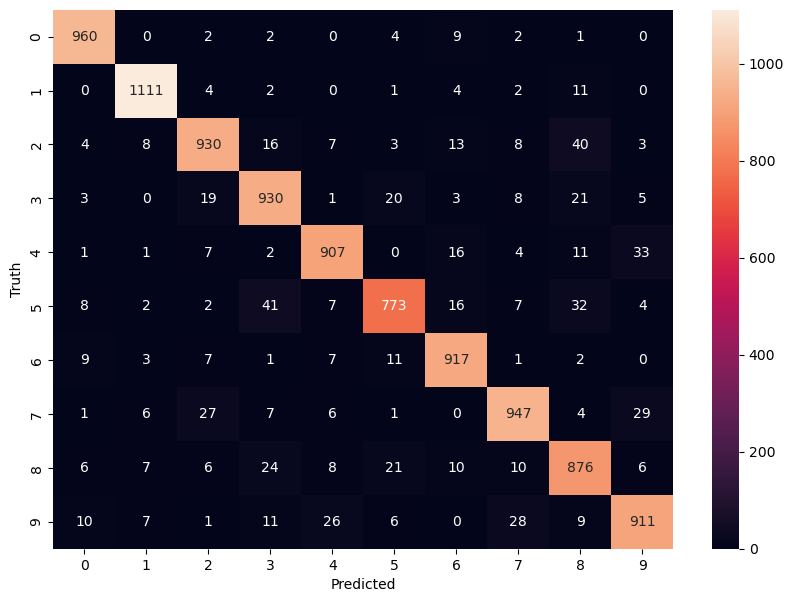

In [112]:
#plot confusion matrix with seaborn heatmap

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')